In [21]:
%matplotlib inline

import sys
sys.path.append('../')

In [22]:
from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

runs_margin = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "kmeans",10, 30, 0.01, "Adam"])
print(len(runs_margin))
run_ids_margin = get_run_ids(runs_margin)

10


In [23]:
runs_least = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True],["bp_prop_clustersize", "least_confident", "kmeans", 30, 0.01, 10])
print(len(runs_least))
run_ids_least = get_run_ids(runs_least)

10


In [24]:
runs_entropy = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True],["bp_prop_clustersize", "entropy", "kmeans", 30, 0.01, 10])
print(len(runs_entropy))
run_ids_entropy = get_run_ids(runs_entropy)

10


In [25]:
samples_labeled_margin, avg_accs_margin = get_labeledSamples_avgAcc(run_ids_margin, tracking)
samples_labeled_least, avg_accs_least = get_labeledSamples_avgAcc(run_ids_least, tracking)
samples_labeled_entropy, avg_accs_entropy = get_labeledSamples_avgAcc(run_ids_entropy, tracking)

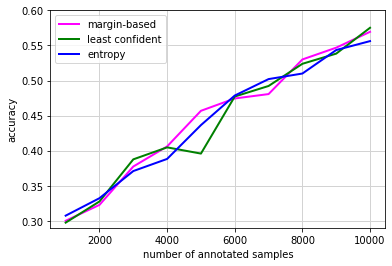

In [26]:
# plot
plt.plot(samples_labeled_margin, avg_accs_margin,color='magenta', label='margin-based', linewidth=2)
plt.plot(samples_labeled_least, avg_accs_least,color='green', label='least confident', linewidth=2)
plt.plot(samples_labeled_entropy, avg_accs_entropy,color='blue', label='entropy', linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

In [27]:
avg_accs_margin

array([0.30001, 0.32268, 0.37737, 0.406  , 0.45679, 0.47438, 0.48065,
       0.53001, 0.54681, 0.56941])

In [28]:
avg_accs_least

array([0.29735, 0.32754, 0.38759, 0.40468, 0.39581, 0.47716, 0.49219,
       0.52382, 0.53832, 0.57515])

In [29]:
avg_accs_entropy

array([0.30732, 0.33223, 0.3709 , 0.3882 , 0.43642, 0.47855, 0.50201,
       0.50994, 0.54343, 0.55617])